# t-SNE from Scratch (ft. NumPy)

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X_mnist = pd.DataFrame(mnist["data"])
y = pd.DataFrame(mnist["target"])

X_mnist = X_mnist.sample(n=1000)
y_mnist = y.loc[X_mnist.index]

X = PCA(n_components=30).fit_transform(X_mnist)

/Users/j227487/miniconda3/envs/blog_posts/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-614.258063,-43.528433,69.838515,230.112501,33.220986,83.771420,671.410162,32.672765,178.965410,-389.504573,...,-0.908044,-216.522985,-335.463230,199.924931,87.193167,-86.766330,-0.582521,87.425721,187.184624,-106.565838
1,25.691737,-412.628133,-196.970344,41.055883,-305.117406,-181.589017,258.879667,-254.767102,75.737215,-655.084533,...,-130.863687,-151.679730,270.413573,-180.979480,-222.239641,-279.542831,-203.122033,96.961449,-118.786559,-173.147995
2,531.458994,813.501787,885.404542,-564.777076,-516.628483,50.662482,213.044379,10.169950,511.339315,188.348603,...,-146.750594,121.068407,-141.419203,24.466202,115.196224,-193.226426,56.198521,100.354587,-60.948367,-193.287179
3,-684.820019,514.159815,-34.189407,110.033362,163.684788,559.499648,-686.629501,-89.016676,202.591740,-97.335245,...,-89.443845,-126.330715,-54.454541,7.657794,94.669022,-270.896456,-236.631906,-6.232714,72.592960,38.443956
4,-304.130215,384.474666,-166.256613,593.330987,-265.977670,331.230603,122.859002,-95.558815,234.460039,-309.008937,...,6.237803,-36.783650,16.186484,166.662775,-110.916097,-149.685724,61.809386,131.470203,129.502429,-72.479689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,532.307329,400.476945,860.216739,325.438555,-83.376040,-149.844893,-254.600689,-441.460103,-134.895851,425.945321,...,281.657244,-448.297788,-157.136328,-1.914596,61.546777,46.626613,-317.261247,143.744302,-127.980323,-24.631528
996,362.035757,48.260429,707.222111,-237.181005,-1007.762581,147.530379,204.365950,-299.690750,422.582620,-303.849892,...,-343.916356,-138.982432,-324.151565,-5.353731,549.836744,325.347215,399.090389,12.118340,234.711094,-22.738320
997,-474.412359,391.415753,723.017342,54.680546,-63.354923,-413.444551,134.871307,208.574909,-162.953377,-393.552371,...,141.073568,341.724635,-26.119179,-6.909261,-127.747002,-72.369152,-29.094856,-43.494352,-7.191079,-124.571419
998,473.735865,354.623683,-590.545876,413.323777,-197.130945,835.015123,-452.645142,928.437165,-413.383958,-124.799225,...,59.056351,329.138585,-338.708579,-102.544487,-152.280285,160.491143,30.900002,-84.925130,152.896783,88.742633


In [4]:
import tsne

X = np.array(X)

p_ij = tsne.get_original_pairwise_affinities(X)

Computing Pairwise Affinities....
Completed Pairwise Affinities Matrix. 



In [5]:
pd.DataFrame(p_ij)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,5.179035e-06,2.874287e-12,2.492700e-06,2.779916e-04,1.383023e-18,2.581610e-06,3.476479e-11,2.467558e-03,1.951001e-12,...,2.465281e-06,3.275783e-04,8.344895e-08,9.144821e-17,9.796070e-11,3.518674e-14,5.188008e-10,2.307395e-04,4.891667e-13,8.978968e-03
1,8.414496e-06,4.940656e-324,1.700078e-14,9.622758e-11,2.888186e-06,2.051390e-17,1.005083e-07,1.228306e-14,5.927514e-10,3.731303e-13,...,7.387749e-10,5.823443e-07,4.106422e-07,2.629275e-13,9.306012e-11,1.106885e-16,2.041679e-12,3.985963e-08,1.092838e-16,3.608323e-10
2,2.431088e-08,1.612017e-08,4.940656e-324,9.455221e-10,1.176074e-07,5.591306e-09,8.292671e-08,4.245002e-11,2.095489e-09,3.234629e-08,...,9.718275e-10,1.487098e-09,2.142541e-13,4.057108e-12,1.478716e-07,1.050678e-07,3.140053e-04,8.028138e-06,2.604204e-11,6.308449e-09
3,2.987082e-10,2.418825e-14,5.662679e-20,4.940656e-324,1.376545e-08,1.528977e-25,1.250726e-11,1.422097e-10,2.058722e-11,4.989518e-18,...,8.844447e-15,4.155907e-08,1.991953e-16,1.068620e-22,5.367524e-13,2.469835e-17,3.254081e-21,2.420299e-12,2.966123e-14,2.208230e-11
4,1.239044e-03,2.661693e-05,3.230553e-09,3.599054e-04,4.940656e-324,2.349915e-14,1.647902e-05,1.456142e-07,1.692608e-05,7.282695e-09,...,9.623639e-05,3.173263e-06,1.311826e-06,2.547329e-13,1.976989e-07,1.279508e-11,2.811403e-08,2.299884e-05,1.784168e-08,4.857066e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.336416e-11,8.392830e-11,1.465726e-08,2.971660e-09,7.577634e-11,2.358594e-09,1.082450e-09,2.903816e-10,2.393856e-09,6.856412e-09,...,2.089912e-10,2.593279e-07,1.392792e-11,3.904052e-14,5.060780e-07,4.940656e-324,1.056435e-11,5.293776e-07,7.857160e-12,1.438256e-09
996,1.644112e-08,4.786223e-10,2.859604e-02,4.074448e-17,1.331090e-08,3.540826e-22,1.942108e-09,2.626714e-22,4.802672e-15,8.895480e-06,...,4.750747e-17,3.545739e-12,1.041905e-18,1.978605e-24,3.847599e-07,5.622640e-17,4.940656e-324,4.100330e-09,1.162836e-20,6.128097e-14
997,1.037542e-05,7.483007e-10,9.637355e-11,3.162940e-10,3.028940e-08,2.790900e-18,4.576228e-08,8.688915e-14,2.015565e-04,1.929114e-12,...,1.431834e-08,3.748334e-08,3.041015e-14,5.079058e-22,1.724994e-10,9.119089e-12,4.560350e-13,4.940656e-324,7.582799e-16,6.761883e-05
998,7.474063e-09,1.487098e-09,4.074737e-11,8.965598e-07,3.488839e-07,2.813005e-11,5.920973e-08,1.662889e-01,7.127913e-09,1.044106e-08,...,2.268453e-04,8.096587e-09,1.139375e-06,2.276995e-09,1.119245e-07,2.341242e-10,1.126950e-11,1.260815e-08,4.940656e-324,3.879113e-09


In [6]:
p_ij_symmetric = tsne.get_symmetric_p_ij(p_ij)

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 



In [8]:
pd.DataFrame(p_ij_symmetric)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,6.796766e-09,1.215688e-11,1.246499e-09,7.585178e-07,3.110192e-15,6.686102e-09,8.126025e-11,1.233779e-06,4.092296e-11,...,1.005498e-08,1.683531e-07,3.028302e-10,6.817239e-11,1.017414e-10,4.169967e-14,8.479958e-12,1.205575e-07,3.737276e-12,4.489544e-06
1,6.796766e-09,4.940656e-324,8.060095e-12,4.812589e-14,1.475256e-08,9.852356e-13,5.984042e-10,1.254122e-11,2.963757e-13,1.324239e-10,...,7.441597e-12,2.938365e-10,1.293485e-09,7.306432e-09,4.408264e-10,4.196420e-14,2.403320e-13,2.030397e-11,7.435490e-13,1.804161e-13
2,1.215688e-11,8.060095e-12,4.940656e-324,4.727611e-13,6.041895e-11,1.201712e-11,4.163886e-11,1.210557e-13,1.047745e-12,8.093924e-11,...,4.859201e-13,7.435491e-13,1.072777e-16,2.332259e-11,1.344873e-10,5.986251e-11,1.445502e-05,4.014117e-09,3.339471e-14,3.154225e-12
3,1.246499e-09,4.812589e-14,4.727611e-13,4.940656e-324,1.799596e-07,1.677303e-15,5.300890e-10,2.925239e-08,1.029361e-14,2.642700e-11,...,4.808541e-13,1.776921e-09,4.219560e-13,7.624085e-11,2.282695e-09,1.485830e-12,2.037387e-20,1.593572e-13,4.482799e-10,1.104325e-14
4,7.585178e-07,1.475256e-08,6.041895e-11,1.799596e-07,4.940656e-324,1.272058e-14,1.116319e-08,1.138283e-09,8.463042e-09,3.442235e-10,...,9.907400e-08,1.587093e-09,8.444562e-10,9.937243e-11,1.355283e-09,4.428571e-14,2.071246e-11,1.151456e-08,1.833628e-10,2.428533e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.169967e-14,4.196420e-14,5.986251e-11,1.485830e-12,4.428571e-14,3.648660e-11,5.544169e-13,4.380459e-12,1.196928e-12,1.049398e-10,...,1.045354e-13,1.296650e-10,7.552767e-15,1.490051e-11,1.022627e-09,4.940656e-324,5.282201e-15,2.646934e-10,1.209907e-13,7.191281e-13
996,8.479958e-12,2.403320e-13,1.445502e-05,2.037387e-20,2.071246e-11,3.088898e-15,1.983536e-12,5.481772e-15,2.401336e-18,1.317055e-08,...,4.852292e-19,1.773580e-15,6.593782e-17,3.546348e-12,1.218940e-09,5.282201e-15,4.940656e-324,2.050393e-12,5.634750e-15,3.064048e-17
997,1.205575e-07,2.030397e-11,4.014117e-09,1.593572e-13,1.151456e-08,1.085538e-12,5.657666e-09,1.057418e-10,1.007782e-07,1.125555e-09,...,3.339219e-09,3.004799e-11,4.978820e-13,2.841082e-11,3.675871e-09,2.646934e-10,2.050393e-12,4.940656e-324,6.304073e-12,3.381118e-08
998,3.737276e-12,7.435490e-13,3.339471e-14,4.482799e-10,1.833628e-10,4.765319e-14,2.974747e-11,1.189070e-04,3.563957e-12,3.075993e-11,...,1.566717e-07,4.048294e-12,5.833448e-10,9.511147e-10,1.139355e-10,1.209907e-13,5.634750e-15,6.304073e-12,4.940656e-324,1.939556e-12


In [9]:
y0 = tsne.initialization(X, 2, "random")

In [10]:
pd.DataFrame(y0)

,0,1
0,-0.000072,-0.000033
1,0.000090,-0.000028
2,0.000006,0.000171
3,-0.000191,-0.000038
4,-0.000036,0.000107
...,...,...
995,0.000105,-0.000053
996,0.000180,-0.000021
997,-0.000002,-0.000019
998,0.000005,-0.000022


In [11]:
q_ij = tsne.get_low_dimensional_affinities(y0)

In [12]:
pd.DataFrame(q_ij)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
1,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
2,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
3,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
4,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06
996,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06,1.001001e-06
997,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06,1.001001e-06
998,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,1.001001e-06,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,1.001001e-06,1.001001e-06,1.001001e-06,4.940656e-324,1.001001e-06


In [13]:
gradient = tsne.get_gradient(p_ij_symmetric, q_ij, y0)

In [14]:
pd.DataFrame(gradient)

,0,1
0,-3.689290e-08,7.150106e-08
1,-1.907744e-07,-7.741160e-08
2,-8.889498e-08,3.720575e-07
3,6.939794e-08,2.486520e-07
4,-1.109237e-07,-1.773371e-08
...,...,...
995,3.065562e-07,1.901867e-07
996,-2.840701e-07,3.872265e-08
997,4.919397e-07,-1.479915e-07
998,2.218779e-08,2.000172e-08


In [15]:
# solution, Y = tsne.low_dimensional_embedding(p_ij_symmetric, y0, T=1000, η=200, early_exaggeration=4, n_dimensions=2)

In [16]:
solution, Y = tsne.tsne(
    X, perplexity=10, T=1000, η=200, early_exaggeration=4, n_dimensions=2
)

Computing Pairwise Affinities....
Completed Pairwise Affinities Matrix. 

Computing Symmetric p_ij matrix....
Completed Symmetric p_ij Matrix. 

Optimizing Low Dimensional Embedding....
Iteration 1: Value of Cost Function is 4.442885481103085
Iteration 50: Value of Cost Function is 2.5711813128415
Iteration 100: Value of Cost Function is 2.282036303147668
Iteration 150: Value of Cost Function is 2.2385786224470983
Iteration 200: Value of Cost Function is 2.2275554777540583
Iteration 250: Value of Cost Function is 2.2238558717011236
Iteration 300: Value of Cost Function is 1.2132787318574323
Iteration 350: Value of Cost Function is 1.1246341089623662
Iteration 400: Value of Cost Function is 1.0974820948136956
Iteration 450: Value of Cost Function is 1.0843882438634274
Iteration 500: Value of Cost Function is 1.0767020149706283
Iteration 550: Value of Cost Function is 1.071699013379928
Iteration 600: Value of Cost Function is 1.067918345870582
Iteration 650: Value of Cost Function is 1.0

In [17]:
pd.DataFrame(solution)

,0,1
0,-20.275367,-177.821196
1,-81.309044,-104.389800
2,88.742870,215.921793
3,176.180252,-165.503785
4,41.778104,-45.911507
...,...,...
995,-43.947448,194.362062
996,120.650457,158.590404
997,68.475776,145.120507
998,109.738242,-61.982627


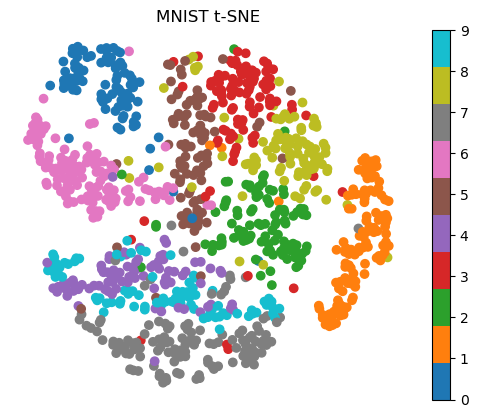

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
g1 = ax.scatter(solution[:, 0], solution[:, 1], c=y_mnist, cmap="tab10")
ax.axis("off")
ax.set_title("MNIST t-SNE")
plt.colorbar(g1, ax=ax)
plt.show()

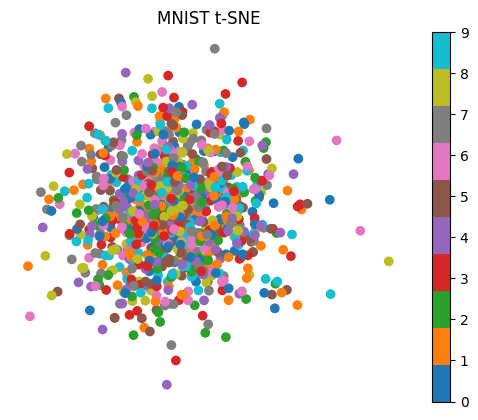

MovieWriter ffmpeg unavailable; using Pillow instead.


In [18]:
from matplotlib import animation

fig, ax = plt.subplots()
ax.axis("off")
ax.set_title("MNIST t-SNE")
scat = ax.scatter(Y[1][:, 0], Y[1][:, 1], c=y_mnist, cmap="tab10")
plt.colorbar(scat, ax=ax)
plt.show()

# t-SNE Descent Animation
ys = []
prelims = list(range(0, 50, 5))
early_range = list(range(50, 250, 10))
mid_range_1 = list(range(250, 300, 5))
mid_range_2 = list(range(300, 400, 10))
end_range = list(range(400, 1000, 50))

visual_range = (
    prelims
    + early_range
    + mid_range_1
    + mid_range_2
    + end_range
    + [999, 999, 999, 999, 999, 999, 999]
)

for i in visual_range:
    ys.append(Y[i])


def strike(text):
    result = ""
    for c in text:
        result = result + c + "\u0336"
    return result


def animate(iterations):
    scat.set_offsets(ys[iterations])
    if iterations < 31:
        ax.text(
            0.05,
            1,
            "Early Exaggeration",
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes,
        )
    else:
        ax.text(
            0.05,
            1,
            strike("                  "),
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes,
        )

    ax.set_xlim(
        [1.25 * np.min(ys[iterations][:, 0]), 1.25 * np.max(ys[iterations][:, 0])]
    )
    ax.set_ylim(
        [1.25 * np.min(ys[iterations][:, 1]), 1.25 * np.max(ys[iterations][:, 1])]
    )


rot_animation = animation.FuncAnimation(
    fig, animate, frames=len(ys) - 1, interval=350, blit=False
)

rot_animation.save("MNIST.gif", dpi=250)